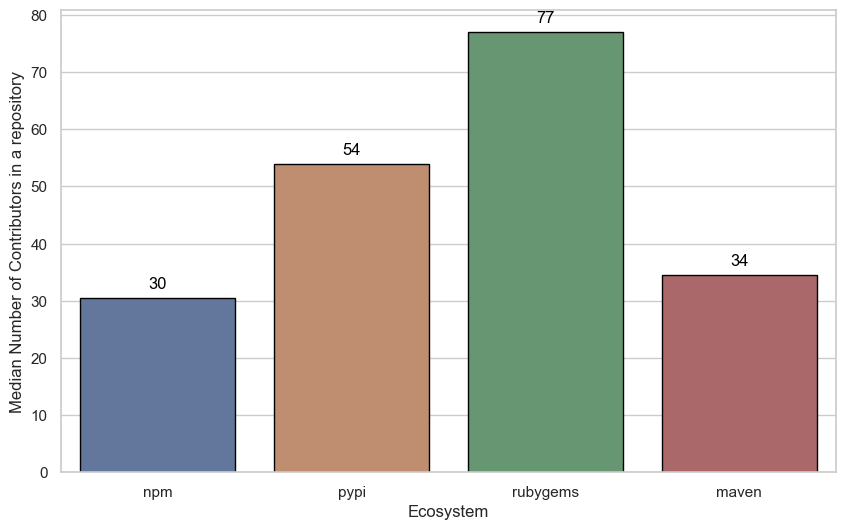

In [1]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Read the CSV data into a DataFrame
# df = pd.read_csv('community_participation_records_new.csv')

# # Ensure 'totalContributors' is numeric
# df['totalContributors'] = pd.to_numeric(df['totalContributors'], errors='coerce')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV data into a DataFrame
df = pd.read_csv('community_participation_records_new.csv')

# Ensure 'totalContributors' is numeric
df['totalContributors'] = pd.to_numeric(df['totalContributors'], errors='coerce')

# Define custom order for 'ecosystem'
custom_order = ['npm', 'pypi', 'rubygems', 'maven']

# Group by 'ecosystem' and calculate the median
median_contributors = df.groupby('ecosystem')['totalContributors'].median().reset_index()

# Reorder the DataFrame based on the custom order
median_contributors['ecosystem'] = pd.Categorical(median_contributors['ecosystem'], categories=custom_order, ordered=True)
median_contributors = median_contributors.sort_values('ecosystem')

# Define custom colors for each bar
custom_colors = ['#5975a4', '#cc8963', '#5f9e6e', '#b55d60']

# Set the style of the visualization and custom color palette
sns.set(style="whitegrid")
sns.set_palette(custom_colors)

# Create a barplot for median values with black borders
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='ecosystem', y='totalContributors', data=median_contributors, edgecolor='black')

plt.xlabel('Ecosystem')
plt.ylabel('Median Number of Contributors in a repository')
# plt.title('Median Number of Contributors for Each Ecosystem')

# Print the rounded median values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

# Show the plot
plt.show()
